In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_and_omni.pkl')

<IPython.core.display.Javascript object>


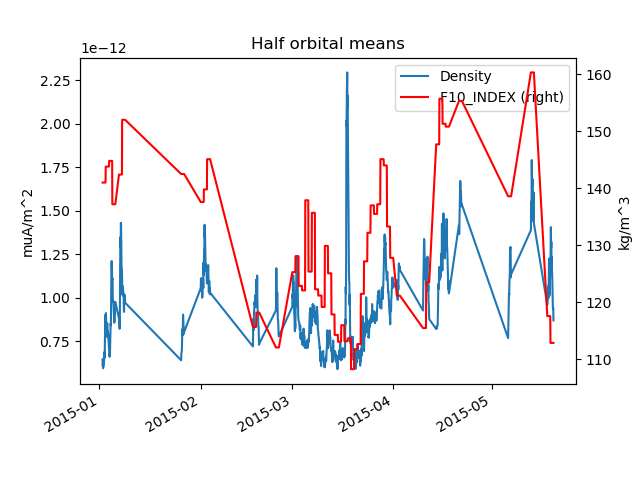

Text(0.5,1,'Half orbital means')

In [3]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].F10_INDEX.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Half orbital means')

In [18]:
Half_orbit[Half_orbit.Hemisphere==1].Density.mean()

9.536254472127974e-13

In [4]:
Half_orbit[Half_orbit.Hemisphere==-1].Density.mean()

8.436203784642683e-13

In [5]:
y = Half_orbit.Density
x1 = Half_orbit.F10_INDEX.values
x2 = Half_orbit.F10_Mean.values

In [6]:
x = Half_orbit.F10_INDEX.values[:, np.newaxis]
model1 = LinearRegression(fit_intercept=True)
model1.fit(x, y)

res1 = y-x[:,0]*model1.coef_[0]-model1.intercept_

print(model1.intercept_)
print(model1.coef_)

Half_orbit.loc[:,'model1'] =  res1

-3.61444053094e-14
[  7.17194395e-15]


In [7]:
x = Half_orbit.F10_Mean.values[:, np.newaxis]
model2 = LinearRegression(fit_intercept=True)
model2.fit(x, y)

res2 = y-x[:,0]*model2.coef_[0]-model2.intercept_

print(model2.intercept_)
print(model2.coef_)

Half_orbit.loc[:,'model2'] =  res2

1.42110565497e-12
[ -3.65426334e-15]


In [8]:
x = (Half_orbit.F10_Mean.values+Half_orbit.F10_INDEX.values)[:, np.newaxis]/2
model3 = LinearRegression(fit_intercept=True)
model3.fit(x, y)

res3 = y-x[:,0]*model3.coef_[0]-model3.intercept_

print(model3.intercept_)
print(model3.coef_)

Half_orbit.loc[:,'model3'] =  res3

-1.24951268259e-14
[  6.66646715e-15]


In [9]:
x = (Half_orbit.F10_Mean.values+Half_orbit.F10_INDEX.values)[:, np.newaxis]/2
x = np.hstack([x,Half_orbit.FAC.values[:, np.newaxis]])
model4 = LinearRegression(fit_intercept=True)
model4.fit(x, y)

res4 = y-x[:,0]*model4.coef_[0]-model4.intercept_

print(model4.intercept_)
print(model4.coef_)

Half_orbit.loc[:,'model4'] =  res4

-2.10857071192e-13
[  6.28163016e-15   1.78075653e-12]


<IPython.core.display.Javascript object>


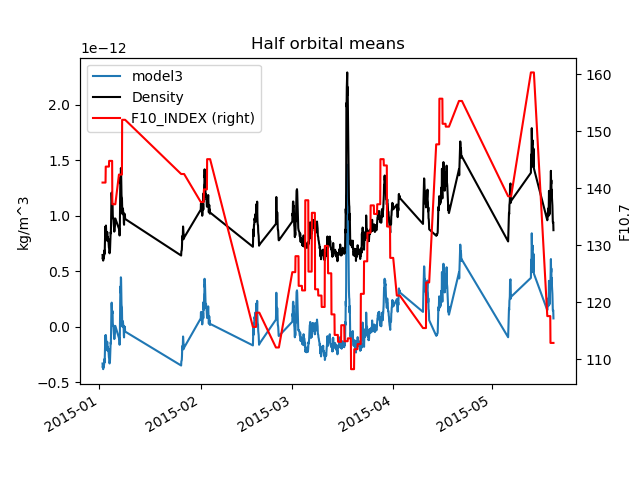

Text(0.5,1,'Half orbital means')

In [10]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].model3.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(legend=True,style='k')
p2 = Half_orbit[Half_orbit.Hemisphere==1].F10_INDEX.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('kg/m^3')
p1.right_ax.set_ylabel('F10.7')
plt.title('Half orbital means')

In [11]:
quiet =  Half_orbit[Half_orbit.Kp < 4]

In [12]:
y_quiet = quiet.Density
x_quiet = (quiet.F10_Mean.values+quiet.F10_INDEX.values)[:, np.newaxis]/2
x = (Half_orbit.F10_Mean.values+Half_orbit.F10_INDEX.values)[:, np.newaxis]/2

model5 = LinearRegression(fit_intercept=True)
model5.fit(x_quiet, y_quiet)

res5 = y-x[:,0]*model5.coef_[0]-model5.intercept_

print(model5.intercept_)
print(model5.coef_)

Half_orbit.loc[:,'model5'] =  res5

-1.82931731949e-13
[  7.48351695e-15]


<IPython.core.display.Javascript object>


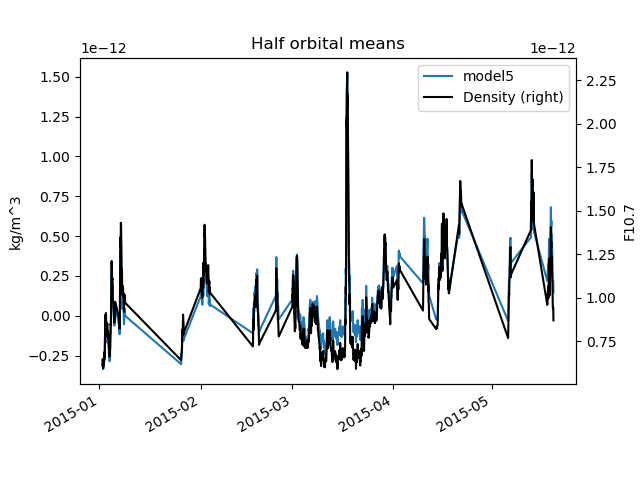

Text(0.5,1,'Half orbital means')

In [13]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].model5.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True,legend=True,style='k')
#p2 = Half_orbit[Half_orbit.Hemisphere==1].AP_INDEX.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('kg/m^3')
p1.right_ax.set_ylabel('F10.7')
plt.title('Half orbital means')

<IPython.core.display.Javascript object>


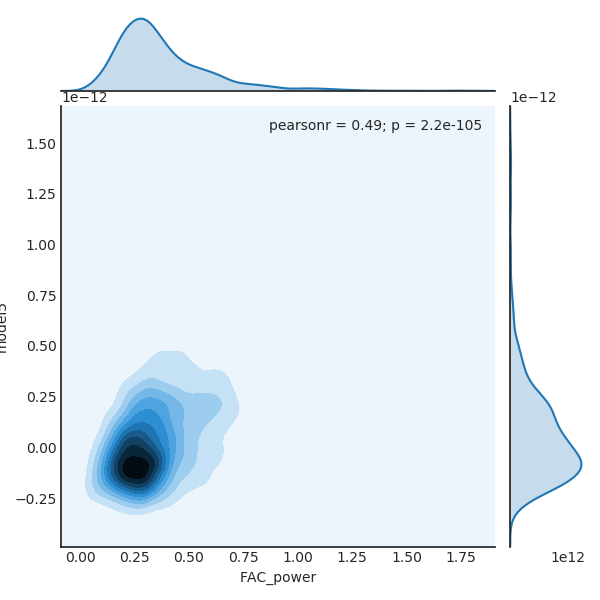

In [15]:
with sns.axes_style('white'):
    sns.jointplot("FAC_power", "model5", Half_orbit, kind='kde');

In [17]:
active = Half_orbit[Half_orbit.Kp >= 4]

<IPython.core.display.Javascript object>


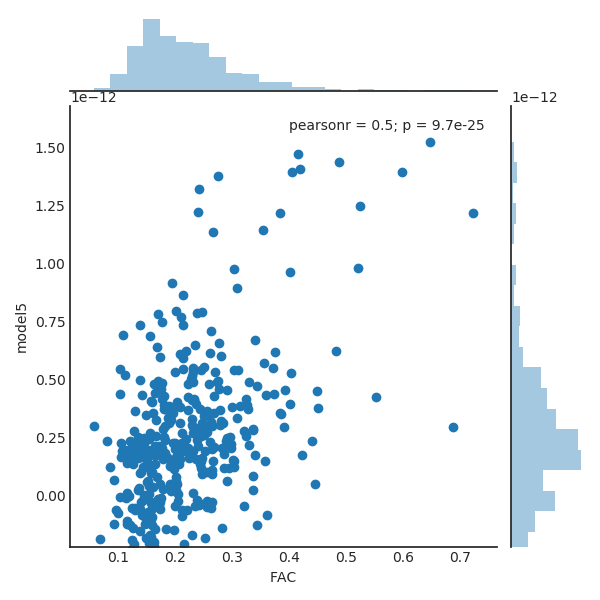

In [19]:
with sns.axes_style('white'):
    sns.jointplot("FAC", "model5", active,ylim=[active.model5.min()*0.9,active.model5.max()*1.1]);